# Numerical Exponential Integral Analysis
## John Aoga

Dans cette session pratique, nous aborderons l'approximation de la fonction $Ei = -\int^{\infty}_{-x} \frac{exp(-t)} {t}dt = \int_{-\infty}^{x} \frac{exp(t)} {t}dt $.
- Nous ferons nos tests de validité de nos résultats avec l'intégration effectuée dans le langage lui-même. La document par rapport aux méthodes numériques dans Python se trouve [ici](https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/16-scipy.html#:~:text=Numerical%20integration&text=It%20takes%20as%20input%20arguments,numerical%20error%20of%20that%20result.).
- La documentation par rapport à comment tracer les courbes avec python et matplotlib se trouve [ici](https://matplotlib.org/stable/tutorials/index.html).
- Tout ce qu'il y a savoir sur le module math se trouve [ici](https://docs.python.org/3/library/math.html)

## Parameters

In [2]:
N = 100
down = 0
up = 3

## Helpers

In [3]:
from math import *
#from numpy import *

# methode des rectangles
## gauche
def left_rect(fun, a, b, n):
    pas = ( b - a ) / n
    s = sum(list(map(fun, ( a + pas * i for i in range(n)))))
    return s * pas

## droite
def right_rect(fun, a, b, n):
    pas = ( b - a ) / n
    s = sum(list(map(fun, (a + pas * i for i in range(1, n+1)))))
    return s * pas

## milieu
def mid_rect(fun, a, b, n):
    pas = ( b - a ) / n
    s = sum(list(map(fun, ( a + pas/2.0 + pas * i for i in range(n)))))
    return s * pas

# methode de trapeze
def trapeze( fun, a, b, n ):
    pas = ( b - a ) / n
    s = 0.5 * (fun(a) + fun(b))
    s += sum(list(map(fun, ( a + pas * i for i in range(1, n)))))
    return s * pas

# simpson
def simpson2(fun, a, b, n):
    n *= 2
    pas  = ( b - a ) / n
    s  = fun(a) + fun(b)
    s += 2 * sum((1 + (i % 2)) * fun(a + i * pas) for i in range(1, n))
    return s * pas / 3

In [4]:
def compute_all(f, a, b, n):
    print("python integration = ", quad(f, a, b))
    print("rect gauche = ", left_rect(f, a, b, n))
    print("rect droite = ", right_rect(f, a, b, n))
    print("rect milieu = ", mid_rect(f, a, b, n))
    print("trapeze = ", trapeze(f, a, b, n))
    print("simpson = ", simpson2(f, a, b, n))

### Testing helpers
On testera avec intégrale de $\int^3_0 x^2 dt = 9$

In [5]:
from scipy.integrate import quad
def f_x(x):
    return x*x

compute_all(f_x, 0, 3, 10)

python integration =  (9.000000000000002, 9.992007221626411e-14)
rect gauche =  7.694999999999999
rect droite =  10.395
rect milieu =  8.977499999999997
trapeze =  9.045
simpson =  9.0


## $Ei$ approximation

En considérant des bornes a et b, une approximation théorique de $-\int^{b}_{a} \frac{\exp(-t)}{t} dt$ est $\ln |a|- \ln |b| + \sum^{\infty}_{k=1} \frac{1}{k\times k!}\times (a^k - b^k)$

In [6]:
def ei(x):
    return -exp(-x)/x

#  
# 
def terme(a, b):
    '''A cause de grandeur de factorielle, l'infini de la somme de l'approximation sera fixée à 150.
    Dans d'autres langages il va falloir probablement adopter des valeurs encore plus petites.'''
    return sum([(pow(a, k)-pow(b, k))/(k * factorial(k)) for k in range(1, 150)])

def ei_approx(a, b):
    return log(abs(a))-log(abs(b)) + terme(a, b)

x = 3
inf = 100
compute_all(ei, -x, inf, 500)
print("ei approx = ", ei_approx(-x, inf))

python integration =  (9.155784026315892, 0.030109140432180936)
rect gauche =  10.008083030345064
rect droite =  8.62887616161951
rect milieu =  25.563941692768868
trapeze =  9.318479595982287
simpson =  20.148787660506333
ei approx =  -2.7155494083117375e+41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


## Analysis

### Moving infinity

Que se passe t'il quand on fait évoluer la valeur de infinie?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # This is added back by InteractiveShellApp.init_path()


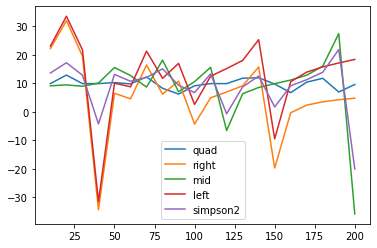

In [7]:
import matplotlib.pyplot as plt

def f_y(n):
    return mid_rect(ei, -3, 10, n)

a = -3
b = 10
n = 100

X   = list(range(10, 201, 10))
Y   = [quad(ei, a, i)[0] for i in X]
Y_l = [left_rect(ei, a, i, n) for i in X]
Y_m = [mid_rect(ei, a, i, n) for i in X]
Y_r = [right_rect(ei, a, i, n) for i in X]
Y_s = [simpson2(ei, a, i, n) for i in X]


plt.plot(X, Y  , label='quad')
plt.plot(X, Y_r, label='right')
plt.plot(X, Y_m, label='mid')
plt.plot(X, Y_l, label='left')
plt.plot(X, Y_s, label='simpson2')

plt.legend(loc="best")
plt.show()



Il est claire qu'à travers l'analyse de cette courbe que les valeurs ne convergent pas quand on augmente la valeur de l'infinie à un $x$ fixe. Il est difficile de tirer une conclusion particulière de cette analyse.

### Moving the number of iterations

Que se passe t'il quand on varie le nombre d'itération des méthodes d'évaluation de l'intégrale, est-ce qu'on se rapproche de la valeur calculée par le langage?

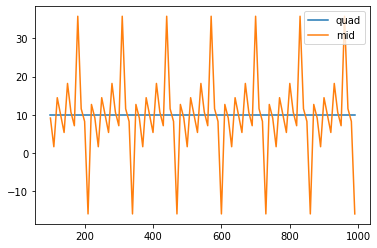

In [9]:
import matplotlib.pyplot as plt
from scipy.integrate import quad


a = -3
b = 10

X = list(range(100, 1000, 10))
Y = [quad(ei, a, b)[0] for i in X]
#Y_l = [left_rect(ei, a, b, i) for i in X]
Y_m = [mid_rect(ei, a, b, i) for i in X]
#Y_r = [right_rect(ei, a, b, i) for i in X]
#Y_s = [simpson2(ei, a, b, i) for i in X]


plt.plot(X, Y, label='quad')
#plt.plot(X, Y_r, label='right')
#plt.plot(X, Y_m, 'p', label='mid')
plt.plot(X, Y_m, label='mid')

#for i in range(len(X)):
#    print(X[i], Y[i])

#plt.plot(X, Y_l, label='left')
#plt.plot(X, Y_s, label='simpson2')
plt.legend(loc="upper right")
plt.show()


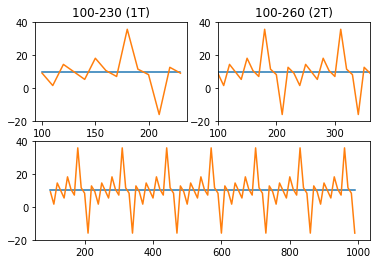

In [13]:


X = list(range(100, 1000, 10))
X1 = list(range(100, 231, 10))
X2 = list(range(100, 361, 10))

Y = [quad(ei, a, b)[0] for i in X]
Y1 = [quad(ei, a, b)[0] for i in X1]
Y2 = [quad(ei, a, b)[0] for i in X2]

Y_m = [mid_rect(ei, a, b, i) for i in X]
Y_m_1 = [mid_rect(ei, a, b, i) for i in X1]
Y_m_2 = [mid_rect(ei, a, b, i) for i in X2]


ax1 = plt.subplot(212)
ax1.plot(X, Y, X, Y_m)
ax1.set_ylim([-20,40])

ax2 = plt.subplot(221)
ax2.plot(X1, Y1, X1, Y_m_1)
ax2.set_title('100-230 (1T)')
ax2.set_ylim([-20,40])

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(X2, Y2, X2, Y_m_2)
ax3.set_title('100-360 (2T)')
ax3.set_ylim([-20,40])

plt.show()

On remarque que:
- pour plusieurs $N$ les valeurs tourne autour de la valeur obtenue avec `quad()` cependant il y a deux valeur (les pics) abérantes à expliquer. 
- la resultat est périodique de période $T = 130$ qui interpelle sur ce qui peut bien être à l'origine de cela. Donc une exploration analytique doit nous permettre de vérifier pourquoi?